# **Análise de Dados: COVID-19 Dashboard**
Autor [Vinícius Oliveira](https://www.linkedin.com/in/vinicius-oliveira-p1/)

---

## **1\.Objetivo do Projeto**

O objetivo deste projeto é **desenvolver um dashboard interativo** para a análise detalhada da evolução dos casos de ***COVID-19*** e da vacinação no **Brasil**.

O projeto inclui o **processamento e a preparação dos dados**, garantindo a **qualidade e a integridade das informações**. Utilizaremos o **Looker Studio** para a visualização desses dados, permitindo a criação de **representações visuais interativas e dinâmicas**.
Combinando o processamento meticuloso dos dados e uma visualização avançada, o projeto visa oferecer uma **ferramenta robusta** para a análise e interpretação eficaz das informações sobre a pandemia no Brasil.


### **1.1. TLDR**

 - **Dashboard**:
  - Looker Studio ([Link](https://lookerstudio.google.com/reporting/7a414632-a04e-4602-988e-b435e2d6d505)).
 - **Processamento**:
  - Kaggle Notebook [Link](https://www.kaggle.com/code/vinciusoliveirap1/an-lise-de-dados-covid-19-dashboard).
 - **Fontes**:
  - Casos pela universidade John Hopkins ([link](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports));
  - Vacinação pela universidade de Oxford ([link](https://covid.ourworldindata.org/data/owid-covid-data.csv)).

### **1.2. Pandemia Coronavírus 2019**

> A COVID-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. Fonte: Governo brasileiro ([link](https://www.gov.br/saude/pt-br/coronavirus/o-que-e-o-coronavirus)).

A disponibilidade de dados sobre a evolução da pandemia ao longo do tempo em uma determinada região geográfica é fundamental para seu combate. Este projeto tem como objetivo construir um dashboard para a exploração e visualização interativa dos dados sobre o avanço dos casos e da vacinação no Brasil.

O processamento dos dados pode ser acessado [neste link](https://www.kaggle.com/code/vinciusoliveirap1/an-lise-de-dados-covid-19-dashboard) e o dashboard está disponível ([Link](https://lookerstudio.google.com/reporting/7a414632-a04e-4602-988e-b435e2d6d505)).


### **1.3. Dados**

Os dados sobre **casos de COVID-19** são compilados pelo Centro de Ciência de Sistemas e Engenharia da Universidade Johns Hopkins ([link para a universidade](https://www.jhu.edu)). Estes dados são atualizados diariamente desde janeiro de 2020, com granularidade temporal diária e geográfica detalhada por regiões de países, como estados e condados.

Você pode acessar o website do projeto [aqui](https://systems.jhu.edu/research/public-health/ncov/), e os dados estão disponíveis [neste repositório do GitHub](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports).

Abaixo, descrevemos os dados derivados do processamento realizado.


- **date:** Data de referência.
- **state:** Estado.
- **country:** País.
- **population**: População estimada.
- **confirmed:** Número acumulado de infectados.
- **confirmed_1d:** Número diário de infectados.
- **confirmed_moving_avg_7d:** Média móvel de 7 dias do número diário de infectados.
- **confirmed_moving_avg_7d_rate_14d:** Relação entre a média móvel de 7 dias do número diário de infectados e a média móvel de 7 dias de 14 dias atrás.
- **deaths:** Número acumulado de mortos.
- **deaths_1d:** Número diário de mortos.
- **deaths_moving_avg_7d:** Média móvel de 7 dias do número diário de mortos.
- **deaths_moving_avg_7d_rate_14d:** Relação entre a média móvel de 7 dias do número diário de mortos e a média móvel de 7 dias de 14 dias atrás.
- **month:** Mês de referência.
- **year:** Ano de referência.

Os dados sobre **vacinação da COVID-19** são compilados pelo projeto Nosso Mundo em Dados (*Our World in Data* ou OWID) da Universidade Britânica de **Oxford** ([link para a universidade](https://www.ox.ac.uk)). Esses dados são **atualizados diariamente** desde janeiro de 2020, com uma **granularidade temporal de dias e geográfica de países**.

Você pode acessar o website do projeto [aqui](https://ourworldindata.org), e os dados estão disponíveis [neste link](https://covid.ourworldindata.org/data/owid-covid-data.csv).

Abaixo, estão descritos os dados derivados do seu processamento.


- **date:**Data de referência.
- **country:** País.
- **population:** População estimada.
- **total:** Número acumulado de doses administradas.
- **one_shot:** Número acumulado de pessoas que receberam uma dose.
- **one_shot_perc:** Percentual acumulado de pessoas que receberam uma dose.
- **two_shots:** Número acumulado de pessoas que receberam duas doses.
- **two_shot_perc:** Percentual acumulado de pessoas que receberam duas doses.
- **three_shots:** Número acumulado de pessoas que receberam três doses.
- **three_shot_perc:** Percentual acumulado de pessoas que receberam três doses.
- **month:** Mês de referência.
 -**year:** Ano de referência.

---

## **2\. Pacotes e bibliotecas**

In [ ]:
import math
from typing import Iterator
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

## **3\. Análise Exploratória de Dados**

##**3.1 Casos**
Os dados estão compilados em arquivos diários, com cada arquivo correspondendo a um dia específico. Por exemplo, há um arquivo para 01/12/2021, que contém os dados referentes a esse dia, e assim por diante para cada dia. <br> Para análise e processamento, iremos iterar sobre esses arquivos diários dentro do intervalo de tempo definido, garantindo que a extração e a manipulação dos dados sejam realizadas de forma precisa e organizada.

###**3.1.1 Extração**

In [ ]:
# Coletando os dados e salvando na variável "cases"
cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv", sep=",")

In [ ]:
cases.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-13 05:22:15,33.93911,67.709953,53584,2301,44608,6675,Afghanistan,137.647787,4.294192
1,NaN,NaN,NaN,Albania,2021-01-13 05:22:15,41.15330,20.168300,64627,1252,38421,24954,Albania,2245.708527,1.937271
2,NaN,NaN,NaN,Algeria,2021-01-13 05:22:15,28.03390,1.659600,102641,2816,69608,30217,Algeria,234.067409,2.743543
3,NaN,NaN,NaN,Andorra,2021-01-13 05:22:15,42.50630,1.521800,8682,86,7930,666,Andorra,11236.653077,0.990555
4,NaN,NaN,NaN,Angola,2021-01-13 05:22:15,-11.20270,17.873900,18343,422,15512,2409,Angola,55.811022,2.300605


Iremos agora iterar dentro de um intervalo de tempo definido para extrair os dados desejados

In [ ]:
# Função para criarmos uma lista com 1 dia de diferença entre cada elemento
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
  date_range_days: int = (end_date - start_date).days
  for lag in range(date_range_days):
    yield start_date + timedelta(lag)

In [ ]:
# Período de dias que iremos querer
start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 3, 8)

Criamos uma lista com os países de interesse, no nosso caso pegaremos os países da america do sul, e america central

De maneira iterativa, vamos selecionar as colunas de interesse e as linhas referentes ao Brasil.

Este processo envolverá a identificação e a extração das informações mais relevantes para a análise, garantindo que o conjunto de dados contenha apenas os dados necessários e pertinentes.

In [ ]:
cases = None
cases_is_empty = True

for date in date_range(start_date=start_date, end_date=end_date):

  date_str = date.strftime("%m-%d-%Y")
  data_source_url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date_str}.csv"

  i = pd.read_csv(data_source_url, sep=",")

  i = i.drop(["FIPS"
    ,"Admin2"
    ,"Last_Update"
    ,"Lat"
    ,"Long_"
    ,"Recovered"
    ,"Active"
    ,"Combined_Key"
    ,"Case_Fatality_Ratio"
      ], axis=1)
  i = i.query("Country_Region == 'Brazil'").reset_index(drop=True)
  i["Date"] = pd.to_datetime(date.strftime("%Y-%m-%d"))

  if cases_is_empty:
    cases = i
    cases_is_empty = False
  else:
    cases = pd.concat([cases, i], ignore_index =True)


In [ ]:
cases.query("Country_Region == 'Brazil'").tail()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
21487,Roraima,Brazil,182485,2180,30124.917253,2023-03-07
21488,Santa Catarina,Brazil,1985888,22703,27717.330925,2023-03-07
21489,Sao Paulo,Brazil,6469442,179039,14088.797876,2023-03-07
21490,Sergipe,Brazil,359674,6502,15646.871096,2023-03-07
21491,Tocantins,Brazil,365538,4232,23240.250600,2023-03-07


### **3.1.2 Wrangling**

Vamos manipular os dados para o dashboard, com o foco em garantir uma boa granularidade e a quantidade adequada de informações na base de dados.

In [ ]:
cases.head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
0,Acre,Brazil,41689,796,4726.992352,2021-01-01
1,Alagoas,Brazil,105091,2496,3148.928928,2021-01-01
2,Amapa,Brazil,68361,926,8083.066602,2021-01-01
3,Amazonas,Brazil,201574,5295,4863.536793,2021-01-01
4,Bahia,Brazil,494684,9159,3326.039611,2021-01-01


In [ ]:
cases.shape

(21492, 6)

In [ ]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21492 entries, 0 to 21491
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province_State  21492 non-null  object        
 1   Country_Region  21492 non-null  object        
 2   Confirmed       21492 non-null  int64         
 3   Deaths          21492 non-null  int64         
 4   Incident_Rate   21492 non-null  float64       
 5   Date            21492 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1007.6+ KB


**Observa-se que os dados foram processados corretamente e que a qualidade está excelente. Todos os dados estão no formato adequado e não há valores nulos.**

Agora, iremos realizar o processamento dos dados para otimizar a apresentação em nosso dashboard.

In [ ]:
# Renomeando as colunas
cases = cases.rename(
    columns={
        "Province_State": "state"
        ,"Country_Region": "country"
    }
)
# Colocando as colunas em letras minúsculas
for col in cases.columns:
  cases = cases.rename(columns = {col:col.lower()})

Estamos agora ajustando os nomes dos estados para garantir a consistência e a precisão em nossa base de dados.

In [ ]:
states_map ={
    "Amapa": "Amapá"
    ,"Ceara": "Ceará"
    ,"Espirito Santo": "Espírito Santo"
    ,"Goias": "Goiás"
    ,"Maranhao": "Maranhão"
    ,"Para": "Pará"
    ,"Paraiba": "Paraíba"
    ,"Parana": "Paraná"
    ,"Piaui": "Piauí"
    ,"Rondonia": "Rondônia"
    ,"Sao Paulo": "São Paulo"
      }

cases["state"] = cases["state"].apply(lambda state: states_map.get(state) if state in states_map.keys() else state)

Vamos agora adicionar novas colunas para enriquecer nossa base de dados e aprimorar nossa visualização.

In [ ]:
# Chaves temporais
cases["month"] = cases["date"].apply(lambda x:x.strftime("%Y-%m"))
cases["year"] = cases["date"].apply(lambda y:y.strftime("%Y"))

Cálculo da população estimada para cada estado.

In [ ]:
# População estimada por estado
cases["population"] = round(100000 * (cases["confirmed"] / cases["incident_rate"]))
cases = cases.drop("incident_rate", axis=1)


Cálculo do número total, da média móvel (7 dias) e da estabilidade (14 dias) de casos e mortes por estado.

In [ ]:
cases_ = None
cases_is_empty = True
# Função para cálculo: número de casos está crescendo, diminuindo ou estável
def get_trend(rate: float) -> str:
  if np.isnan(rate):
    return np.NaN
  if rate <= 0.85:
    status = "downward"
  elif rate >= 1.15:
    status = "upward"
  else:
    status = "stable"
  return status

for i in cases["state"].drop_duplicates():
  # Selecionando cada estado e ordenando por data
  try:
    cases_per_state = cases.query(f"state == '{i}'").reset_index(drop=True)
  except:
    pass
  cases_per_state = cases_per_state.sort_values(by=["date"])

  # Processando a quantidade de 1ª, 2ª e 3ª doses, e calculando as médias móveis e a tendência para cada estado
  cases_per_state["confirmed_1d"] = cases_per_state["confirmed"].diff(periods=1)
  cases_per_state["confirmed_moving_avg_7d"] = np.ceil(cases_per_state["confirmed_1d"].rolling(window=7).mean())
  cases_per_state["confirmed_moving_avg_7d_rate_14d"] = cases_per_state["confirmed_moving_avg_7d"]/cases_per_state["confirmed_moving_avg_7d"].shift(periods=14)
  cases_per_state["confirmed_trend"] = cases_per_state["confirmed_moving_avg_7d_rate_14d"].apply(get_trend)
  # Cálculo das médias móveis e da tendência para mortes por estado
  cases_per_state["deaths_1d"] = cases_per_state["deaths"].diff(periods=1)
  cases_per_state["deaths_moving_avg_7d"] = np.ceil(cases_per_state["deaths_1d"].rolling(window=7).mean())
  cases_per_state["deaths_moving_avg_7d_rate_14d"] = cases_per_state["deaths_moving_avg_7d"]/cases_per_state["deaths_moving_avg_7d"].shift(periods=14)
  cases_per_state["deaths_trend"] = cases_per_state["deaths_moving_avg_7d_rate_14d"].apply(get_trend)

  if cases_is_empty:
    cases_ = cases_per_state
    cases_is_empty = False
  else:
    cases_ = pd.concat([cases_, cases_per_state], ignore_index =True)

cases = cases_
cases_ = None

Vamos proceder com o type casting dos dados para garantir a consistência da base de dados, esse processo é essencial para assegurar que todos os dados estejam no formato correto e possam ser manipulados e analisados de maneira precisa.

In [ ]:
# Substituir os valores infinitos por NaN
cases.replace([np.inf, -np.inf], np.nan, inplace=True)
# Conversão de tipo dos dados
cases["population"] = cases["population"].astype("Int64")
cases["confirmed_1d"] = cases["confirmed_1d"].astype("Int64")
cases["confirmed_moving_avg_7d"] = cases["confirmed_moving_avg_7d"].astype("Int64")
cases["deaths_1d"] = cases["deaths_1d"].astype("Int64")
cases["deaths_moving_avg_7d"] = cases["deaths_moving_avg_7d"].astype("Int64")

Para otimizar a visualização dos dados, reorganizaremos as colunas de forma estratégica, com isso, facilitará a análise e tornará a interpretação das informações mais intuitiva e eficiente.

In [ ]:
cases = cases[
    ["date"
    ,"country"
    ,"state"
    ,"population"
    ,"confirmed"
    ,"confirmed_1d"
    ,"confirmed_moving_avg_7d"
    ,"confirmed_moving_avg_7d_rate_14d"
    ,"confirmed_trend"
    ,"deaths"
    ,"deaths_1d"
    ,"deaths_moving_avg_7d"
    ,"deaths_moving_avg_7d_rate_14d"
    ,"deaths_trend"
    ,"month"
    ,"year"
    ]
    ]

In [ ]:
cases.head()

,date,country,state,population,confirmed,confirmed_1d,confirmed_moving_avg_7d,confirmed_moving_avg_7d_rate_14d,confirmed_trend,deaths,deaths_1d,deaths_moving_avg_7d,deaths_moving_avg_7d_rate_14d,deaths_trend,month,year
0,2021-01-01,Brazil,Acre,881935,41689,<NA>,<NA>,NaN,NaN,796,<NA>,<NA>,NaN,NaN,2021-01,2021
1,2021-01-02,Brazil,Acre,881935,41941,252,<NA>,NaN,NaN,798,2,<NA>,NaN,NaN,2021-01,2021
2,2021-01-03,Brazil,Acre,881935,42046,105,<NA>,NaN,NaN,802,4,<NA>,NaN,NaN,2021-01,2021
3,2021-01-04,Brazil,Acre,881935,42117,71,<NA>,NaN,NaN,806,4,<NA>,NaN,NaN,2021-01,2021
4,2021-01-05,Brazil,Acre,881935,42170,53,<NA>,NaN,NaN,808,2,<NA>,NaN,NaN,2021-01,2021


**NOTA 1:** Para calcular a média móvel de 7 dias, é necessário ter pelo menos 7 dados subsequentes. Da mesma forma, para calcular a estabilidade de 14 dias, são necessários 14 dados posteriores. Por isso, é comum observar que os 7 primeiros dados da média móvel e os 14 primeiros dados da estabilidade sejam "NaN".

**NOTA 2:** Em "confirmed_trend", por ser uma variável dependente da estabilidade, nota-se que até a estabilidade ser calculada,"confirmed_trend" será nula.

**NOTA 3:** O mesmo procedimento aplicado às vacinas também é válido para o cálculo de mortes.

### 3.1.3 Carregamento

In [ ]:
# Salvando em um arquivo CSV
cases.to_csv("./covid-cases.csv", sep=",", index=False)

##**3.2 Vacinação**

Agora iremos processar os dados de vacinação da universidade de Oxford

####**3.2.1 Extração**

In [ ]:
# Baixando os dados CSV para vacinação
vaccines = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=",", parse_dates=[3], infer_datetime_format=True)

<ipython-input-20-abae8da960c0>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vaccines = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=",", parse_dates=[3], infer_datetime_format=True)


In [ ]:
vaccines.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


Iremos selecionar as colunas de interesse e as linhas referentes ao Brasil

In [ ]:
vaccines = vaccines.query("location == 'Brazil'").reset_index(drop=True)
vaccines = vaccines[["location"
  ,"population"
  ,"total_vaccinations"
  ,"people_vaccinated"
  ,"people_fully_vaccinated"
  ,"total_boosters"
  ,"date"]]

#### **3.2.2 Wrangling**

Agora iremos manipular e realizar diversas etapas de limpeza e tratamento dos dados, incluindo a remoção de valores nulos, correção de inconsistências e transformação dos dados para garantir uma boa granularidade e qualidade da base de dados

In [ ]:
vaccines.head(1550)

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
0,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-05
1,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-06
2,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-07
3,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-08
4,Brazil,215313504,NaN,NaN,NaN,NaN,2020-01-09
...,...,...,...,...,...,...,...
1545,Brazil,215313504,NaN,NaN,NaN,NaN,2024-03-29
1546,Brazil,215313504,NaN,NaN,NaN,NaN,2024-03-30
1547,Brazil,215313504,NaN,NaN,NaN,NaN,2024-03-31
1548,Brazil,215313504,NaN,NaN,NaN,NaN,2024-04-01


In [ ]:
vaccines.shape

(1660, 7)

In [ ]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 1660 non-null   object        
 1   population               1660 non-null   int64         
 2   total_vaccinations       695 non-null    float64       
 3   people_vaccinated        691 non-null    float64       
 4   people_fully_vaccinated  675 non-null    float64       
 5   total_boosters           455 non-null    float64       
 6   date                     1660 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 90.9+ KB


A base de dados de vacinação apresenta alguns valores faltantes, que foram tratados utilizando o método "ffill()" (forward fill). Este método preenche os dados faltantes com o valor anterior mais próximo, garantindo que não haja lacunas nas séries temporais.

In [ ]:
# Tratando dados faltantes
vaccines = vaccines.ffill()

Além disso, iremos realizar um filtro na coluna "date" para alinhar as bases de dados de casos e vacinação, assegurando que ambas cubram o mesmo período de tempo.

In [ ]:
# Filtrando a coluna "date" para o mesmo período da nossa base de dados
vaccines = vaccines[(vaccines["date"] >= "2021-01-01") & (vaccines["date"] <= "2023-03-08")].reset_index(drop=True)

In [ ]:
# Alterando o nome das colunas
vaccines = vaccines.rename(columns={
    "location":"country"
    ,"total_vaccinations":"total"
    ,"people_vaccinated":"one_shot"
    ,"people_fully_vaccinated":"two_shots"
    ,"total_boosters":"three_shots"
        })

Para nos ajudar em nosso dashboard, iremos preencher os valores iniciais nulos com 0

In [ ]:
vaccines.fillna(value={"total": 0
                       ,"one_shot": 0
                       ,"two_shots":0
                       ,"three_shots":0}, inplace=True)

Agora iremos computar novas colunas para enriquecer a base de dados, proporcionando mais insights para a análise.

In [ ]:
# Chaves temporais
vaccines["month"] = vaccines["date"].apply(lambda date: date.strftime("%Y-%m"))
vaccines["year"]  = vaccines["date"].apply(lambda date: date.strftime("%Y"))

In [ ]:
# Dados relativos
vaccines["one_shot_perc"] = round(vaccines["one_shot"] / vaccines["population"], 4)
vaccines["two_shots_perc"] = round(vaccines["two_shots"] / vaccines["population"], 4)
vaccines["three_shots_perc"] = round(vaccines["three_shots"] / vaccines["population"], 4)

In [ ]:
# Reorganizar as colunas
vaccines = vaccines[
    ["date"
    ,"country"
    ,"population"
    ,"total"
    ,"one_shot"
    ,"one_shot_perc"
    ,"two_shots"
    ,"two_shots_perc"
    ,"three_shots"
    ,"three_shots_perc"
    ,"month"
    ,"year"
    ]]

In [ ]:
vaccines.tail()

,date,country,population,total,one_shot,one_shot_perc,two_shots,two_shots_perc,three_shots,three_shots_perc,month,year
792,2023-03-04,Brazil,215313504,485257376.0,189394362.0,0.8796,175895897.0,0.8169,125724399.0,0.5839,2023-03,2023
793,2023-03-05,Brazil,215313504,485257436.0,189394389.0,0.8796,175895930.0,0.8169,125724399.0,0.5839,2023-03,2023
794,2023-03-06,Brazil,215313504,485257436.0,189394389.0,0.8796,175895930.0,0.8169,125724399.0,0.5839,2023-03,2023
795,2023-03-07,Brazil,215313504,485268593.0,189394850.0,0.8796,175899966.0,0.8169,125731059.0,0.5839,2023-03,2023
796,2023-03-08,Brazil,215313504,485279135.0,189395212.0,0.8796,175904530.0,0.8170,125736675.0,0.5840,2023-03,2023


#### **3.3.3 Carregamento**

Com os dados manipulados e transformados, eles foram persistidos em formatos apropriados para serem utilizados no dashboard.

In [ ]:
vaccines.to_csv("./covid-vaccines.csv", sep=",", index=False)

## **4\. Exploração Interativa de Dados**

Agora iremos processeguir para a explçoração interativa de dados, para isso utilizaremos o Looker Studios para realizarmos nossa exploração.

#### **4.1 KPIs**

Nosso dashboard contém os seguintes indicadores chave de desempenho (KPIs):

1. Casos e mortes nas 24 horas;
1. Média móvel (7 dias) de casos e mortes;
1. Tendência de casos e mortes;
1. Proporção de vacinados com 1ª, 2ª e 3ª doses.


Esses KPIs são essenciais para monitorar o estado atual da pandemia e a eficácia das medidas de vacinação.



#### **4.2 EDA**

O dashboard de dados contém os seguintes gráficos para a análise exploratória de dados:



1. Distribuição do números de casos e mortes ao longo do tempo;
1. Distribuição da média móvel (7 dias) do números de casos e mortes ao longo do tempo;
1. Distribuição geográfica dos casos por estado por dia.


#### **4.3 Visualizações pelo Looker Studio**

Link da vizualização interativa pelo **Looker Studio**
[Link](https://lookerstudio.google.com/reporting/7a414632-a04e-4602-988e-b435e2d6d505)

A seguir, apresento como ficou a **visualização no Looker Studio**

##### **4.3.1** Visualização dos **KPIs** relacionados a **casos** e **mortes**, incluindo a **proporção de vacinados**, com filtragem por data específica, além da exibição do **mapa de distribuição**.

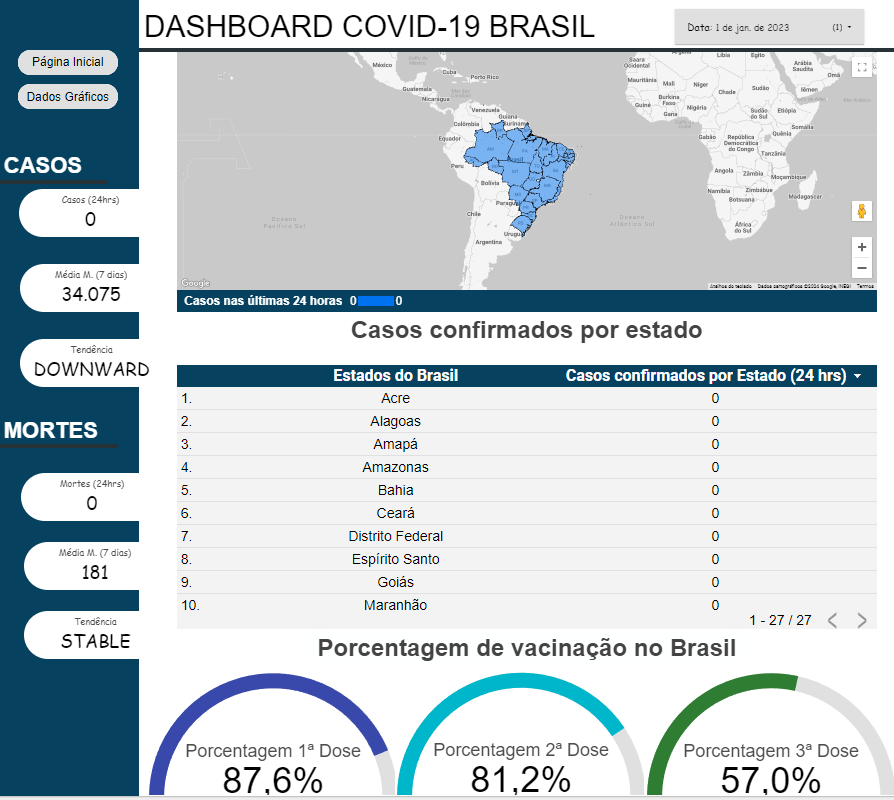

##### **4.3.2** Visualização dos gráficos de **casos** e **mortes** ao longo de **todo o período analisado**

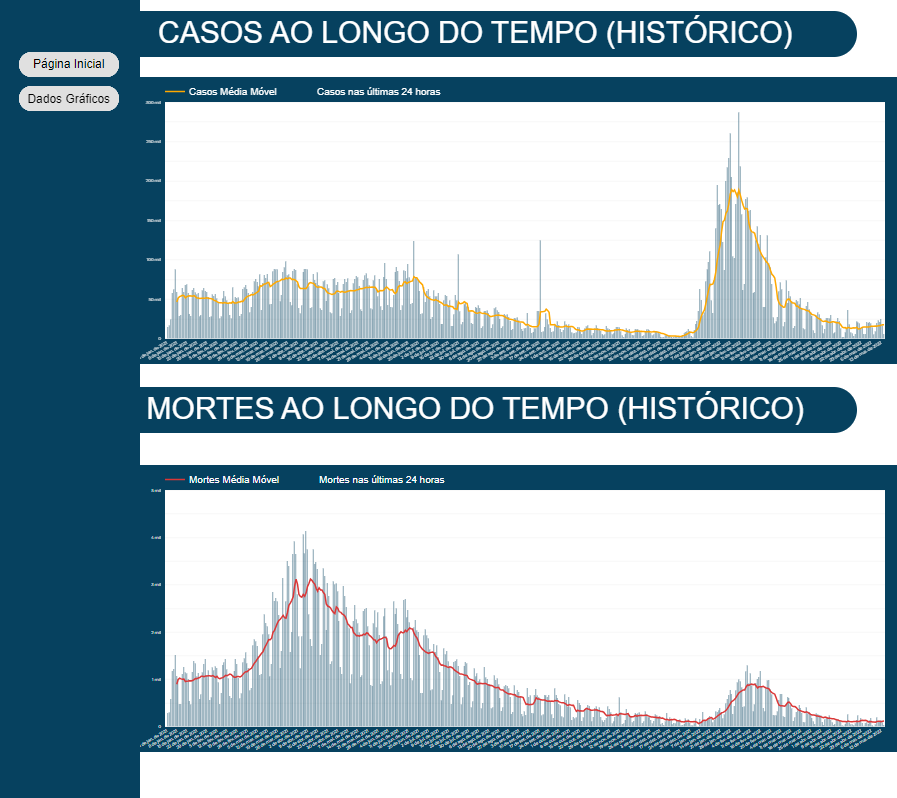

##### **4.3.3** Por fim, a visualização dos gráficos selecionados, onde foi aplicado um filtro para exibir apenas um período específico de dados diretamente no gráfico.

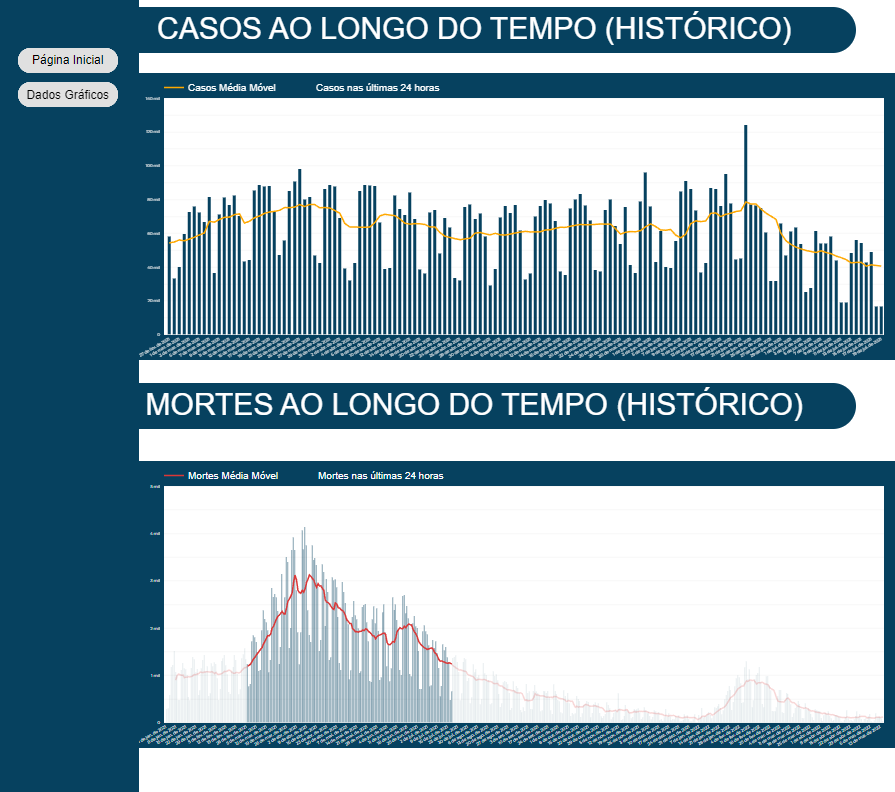

---